# Palindrome Checker
## Homework 7 - AoA
### John Henry Mejia

A palindrome is a nonempty string over some alphabet that reads the same forwards
and backwards. Examples of palindromes are all strings of length 1, civic, racecar, and
aibohphobia (fear of palendromes).

For example, given the input character, your algorithm should return carac. What is the
running time of your algorithm?

In [17]:
# Dynamic programming implementation of LCS problem (BUT NOW FOR PALINDROMES)

#Inputs: string str1, string str2, and the length of str1 and str2
def lcs(str1, str2, m, n):
	L = [[0 for i in range(n+1)] for j in range(m+1)]
	for i in range(m+1):
		for j in range(n+1):
			if i == 0 or j == 0:
				L[i][j] = 0
			elif str1[i-1] == str2[j-1]:
				L[i][j] = L[i-1][j-1] + 1
			else:
				L[i][j] = max(L[i-1][j], L[i][j-1])
	# print(L)
	lcs = ""
	i = m
	j = n
	while i > 0 and j > 0:
		if str1[i-1] == str2[j-1]:
			lcs += str1[i-1]
			i -= 1
			j -= 1

		elif L[i-1][j] > L[i][j-1]:
			i -= 1
		# if L[i][j-1] > L[i-1][j]:
		else:
			j -= 1
	# We need to reverse the string because we are building it backwards
	lcs = lcs[::-1]
	return lcs

In [18]:
# RATS LIVE ON NO EVIL STAR
# A man, a plan, a canal: Panama.

# This function calls the lcs function and returns the longest palindromic subsequence
# Input: string str
def palindrome(str):
    revstr = str[::-1]
    return lcs(str, revstr, len(str), len(revstr))

In [21]:
#Tests palindrome function
testcases = ["a", "aibohphobia", "character", "algorithm", "youknownothingjonsnow", "icantdecidewhatisworsealgorithmsorwisdomteethextration"]

for test in testcases:
    result = palindrome(test)
    print("The longest palindrome in " + test + " is " + result)


The longest palindrome in a is a
The longest palindrome in aibohphobia is aibohphobia
The longest palindrome in character is carac
The longest palindrome in algorithm is m
The longest palindrome in youknownothingjonsnow is onnojonno
The longest palindrome in icantdecidewhatisworsealgorithmsorwisdomteethextration is iatehtetmodomtethetai


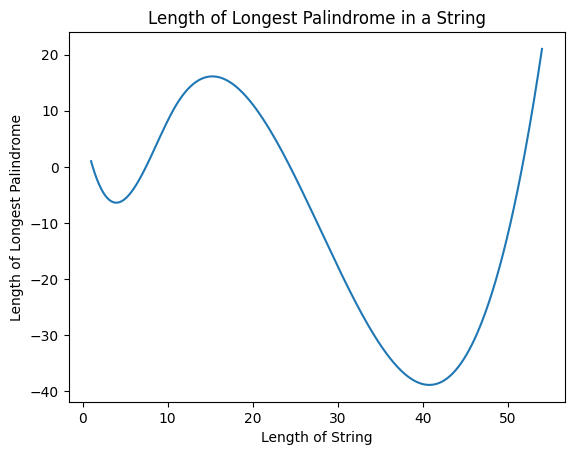

In [22]:
#plots the length of the longest palindrome in each string as a function of the length of the string (BUT NOW SMOOTHED)
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

x = []
y = []

for i in range(len(testcases)):
    #if not already in the list, add the length of the string to the x list
    if len(testcases[i]) not in x:
        x.append(len(testcases[i]))
        y.append(len(palindrome(testcases[i])))
   
#sort the x and y arrays by x
x, y = zip(*sorted(zip(x, y)))


x = np.array(x)
y = np.array(y)

X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)


plt.plot(X_, Y_)
plt.xlabel('Length of String')
plt.ylabel('Length of Longest Palindrome')
plt.title('Length of Longest Palindrome in a String')
plt.show()


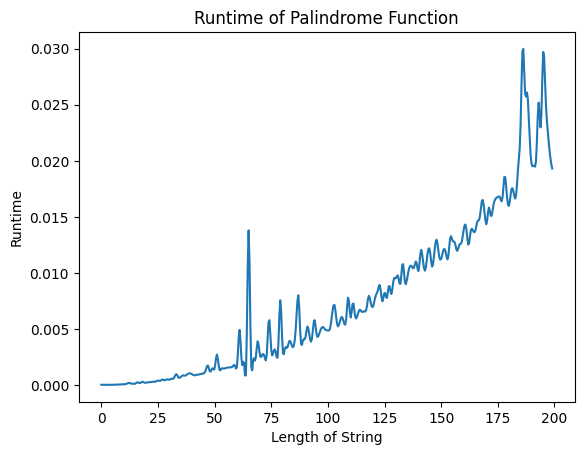

In [25]:
#Find the runtime of the palindrome function
import timeit
import random
import string

#generates a random string of length n
def randomString(stringLength):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

#generates a list of random strings of length n
def randomStringList(n):
    randlist = []
    for i in range(n):
        randlist.append(randomString(i))
    return randlist

#tests the runtime of the palindrome function
def testPalindromeRuntime():
    randlist = randomStringList(100)
    for i in range(len(randlist)):
        start = timeit.default_timer()
        palindrome(randlist[i])
        stop = timeit.default_timer()
        print('Time: ', stop - start)

#testPalindromeRuntime()

#plots the runtime of the palindrome function as a function of the length of the string
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

x = []
y = []

for i in range(200):
    start = timeit.default_timer()
    palindrome(randomString(i))
    stop = timeit.default_timer()
    x.append(i)
    y.append(stop-start)

x = np.array(x)
y = np.array(y)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.

X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.xlabel('Length of String')
plt.ylabel('Runtime')
plt.title('Runtime of Palindrome Function')
plt.show()

As you can see by the graph above the algorithm takes O(n^2) time to run!